## Лабораторная работ 2: Знакомство с архитектурой YOLO для детекции объектов

В рамках данной лабораторной работы будет использоваться реализация YOLOv8 с открытым исходным кодом для обучения и запуска данной модели.

Перед началом работы стоит убедится, что установлена среда выполнения с использованием GPU. Изменить среду выполнения можно в настройке ресурсов Colab.

Для начала работы необходимо уставновить библиотеку с моделью в текущее окружение, выполнив ячейку ниже:

Ознакомиться с документацией данной библиотеки можно по [следющуей ссылке](https://docs.ultralytics.com/).

Далее предлагается ознакомиться с функционалом для работы с библиотекой ultralytics для Python.

In [ ]:
# Сначала следует загрузить тестовое изображение
!curl https://hyperbicycles.com/cdn/shop/files/hyper-collection-e-bikes-29in-mid-drive-mtb_5dfcef23-4a4c-46a8-81c2-16dca199774a_1800x.jpg?v=1657670368 -o test.jpg

In [ ]:
# Запуск модели самой быстрой YOLOv8-Nano (содержит наименьшее количество параметров). Запускаем из консоли
!yolo predict model=yolov8n.pt source='test2.jpg'

In [ ]:
# Визуализация результата работы модели
# Импортируем функцию для отрисовки изображения напрямую в браузерной среде выполнения
from IPython.display import Image
Image(filename='runs/detect/predict/test2.jpg', width=1000)

Выше были представлены консольные команды для запуска модели YOLO, но также данной библиотекой можно пользовать при реализации Python скриптоп, пример кода приведён в ячейках ниже.

In [2]:
from ultralytics import YOLO
import cv2

model = YOLO('yolov8n.pt')
results = model(['test2.jpg'])
result = results[0].cpu()

detection_visualization = result.plot()
detection_visualization = cv2.resize(detection_visualization, None, fx=1/2, fy=1/2)

cv2.imshow('im',detection_visualization)
cv2.waitKey(0)


0: 384x640 7 persons, 42.5ms
Speed: 3.4ms preprocess, 42.5ms inference, 54.9ms postprocess per image at shape (1, 3, 384, 640)


-1

In [1]:
# Также возможно отрисовать детекции на кадре с помощью библиотеки OpenCV
import numpy as np

boxes = result.boxes.data[:, :4].numpy().astype(np.int32)    # Координаты прямоугольника вокруг найденного объекта
probs = result.boxes.conf.numpy()                            # Уверенность сети в данной детекции
cls = result.boxes.cls.numpy().astype(np.int32)              # Индексы имён классов
names = [result.names[c_idx] for c_idx in cls]               # Конвертация индексов в название классов

image = cv2.imread('test2.jpg', cv2.IMREAD_COLOR)  # Открытие цветного изображения (примечание: открывается в BGR)

detection_visualization = image.copy()

text_font = cv2.FONT_HERSHEY_DUPLEX
text_scale = 2.0
colors = [(50, 20, 200), (200, 20, 100)]
text_thickness = 5

for detecion_id in range(len(boxes)):
  target_object_name = names[detecion_id]
  target_object_box = boxes[detecion_id]  # XYXY format
  target_object_prob = float(probs[detecion_id])

  print('Box: {}, name: {}, confidence: {:.2f}'.format(target_object_box, target_object_name, target_object_prob))

  detection_visualization = cv2.rectangle(
      detection_visualization,
      tuple(target_object_box[:2]),
      tuple(target_object_box[2:]),
      colors[detecion_id % len(colors)],
      5
  )


for detecion_id in range(len(boxes)):
  target_object_name = names[detecion_id]
  target_object_box = boxes[detecion_id]
  target_object_prob = float(probs[detecion_id])

  input_text = '{} {:.2f}'.format(target_object_name, target_object_prob)

  (text_width, text_height), baseline = cv2.getTextSize(input_text, text_font, text_scale, text_thickness)

  detection_visualization = cv2.putText(
    detection_visualization,
    input_text,
    (target_object_box[0] + 10, target_object_box[1] + text_height + baseline),
    text_font,
    text_scale,
    colors[detecion_id % len(colors)],
    text_thickness
  )


detection_visualization = cv2.resize(detection_visualization, None, fx=1/2, fy=1/2)

cv2.imshow('im2',detection_visualization)
cv2.waitKey(0)

NameError: name 'result' is not defined

## Экспорт модели
Библиотека позволяет экспортировать модель YOLOv8 для использования на различных платфомах. Например формат ONNX хорошо оптимизирован для запуска сверточных нейронных сетей на процессорах с архитектурой x86, формат CoreML необзодим для запуска моделей на устройствах от компании Apple, формат модели фреймворка TensorFlow-Lite эффективно запускат модели на устройствах под операционной системой Android.
Ниже в ячейке представлены примеры экспорта модели в различные форматы через средсва Python.

In [ ]:
# Для x86
save_path = model.export(format="onnx")
!echo "ONNX SAVE PATH: $save_path"; ls -lah $save_path

# Для iOS
#save_path = model.export(format="coreml")
#!echo "CoreML SAVE PATH: $save_path"; ls -lah $save_path

# Для Android
#save_path = model.export(format="tflite")
#!echo "TF-Lite SAVE PATH: $save_path"; ls -lah $save_path

#### Также библиотека предоставляет консольный функционал для экспорта моделей, пример запуска написан в ячейке ниже:

In [ ]:
!yolo export model=yolov8n.pt format=onnx simplify half

## Задание 1
Теперь попробуйте вернуться к исполняемой ячейке, где происходит скачивание изображения. Найдите в интернете любое изображение с объектами (люди, машины, элементы декора) и замените URL из ячейки на ссылку на выше изображание и произведите шаги с запуском модели и визуализции снова, с вашим изображанием. Также необходимо поменять имя изображения, например на `test2.jpg`.

Теперь попробуйте скачать видео файл и запустить на нём модель. Для этого запустите ячейки ниже:

In [ ]:
from pytubefix import YouTube
from pytubefix.cli import on_progress
 
url = "https://www.youtube.com/watch?v=fLeJJPxua3E"
 
yt = YouTube(url, on_progress_callback = on_progress)
print(yt.title)
 
ys = yt.streams.get_highest_resolution()
ys.download()

In [ ]:
!yolo predict model=yolov8n.pt source='test_video.*'

Если видео не открывается, то скачайте файл из директории `runs/detect/predict3` и воспроизведите его локально на машине

## Обучение собственной модели

Для обучения модели можно взять любой набора данных с сайта [Roboflow](https://universe.roboflow.com/).
Для примера возьмём набор данных детекции людей с [респираторными масками](https://universe.roboflow.com/joseph-nelson/mask-wearing/dataset/19#), чтобы его скачать, выполните код в ячейке ниже:

In [ ]:
#Пример с очками
from roboflow import Roboflow
rf = Roboflow(api_key="Hrz3pdBkU0UwCowauRnm")
#project = rf.workspace("hkj").project("s-gciii")
#dataset = project.version(2).download("yolov8")
project = rf.workspace("joseph-nelson").project("mask-wearing")
dataset = project.version(19).download("yolov8")

Для оубчения моделей из библиотеки ultralytics сначала необходимо подготовить конфигурационный файл, если набор данных скачан из Roboflow, он сгенерирован автоматически и пригалается к набору данных.

In [ ]:
#!cat s-2/data.yaml
!cat Mask-Wearing-19/data.yaml

Для корректного запуска обучения необходимо поправить пути до директорий с изображениями, так как скрипт обучения YOLO будет искать полные пути до директорий с изображениями и разметкой.

In [ ]:
# import pathlib
# import yaml

# def delete_first_folder(p: str) -> str:
#   return str(pathlib.Path(*pathlib.Path(p).parts[1:]))

# with open('s-2/data.yaml', 'r') as f:
#   data = yaml.safe_load(f)

# data['train'] = delete_first_folder(data['train'])
# data['val'] = delete_first_folder(data['val'])
# data['test'] = delete_first_folder(data['test'])

# with open('s-2/fixed_data.yaml', 'w') as f:
#   yaml.safe_dump(data, f)

# data

import pathlib
import yaml

def delete_first_folder(p: str) -> str:
  return str(pathlib.Path(*pathlib.Path(p).parts[1:]))

with open('Mask-Wearing-19/data.yaml', 'r') as f:
  data = yaml.safe_load(f)

data['train'] = delete_first_folder(data['train'])
data['val'] = delete_first_folder(data['val'])
data['test'] = delete_first_folder(data['test'])

with open('Mask-Wearing-19/fixed_data.yaml', 'w') as f:
  yaml.safe_dump(data, f)

data

Теперь можно запустить обучение YOLOv8, для обучение берётся самая легковесная архитектура YOLOv8-Nano.

In [ ]:
# Обучение модели Nano на 10 эпохах с размером входного изображения 480 пикселей
#!yolo detect train model=yolov8n.pt data="s-2/fixed_data.yaml" epochs=10 imgsz=480 device=0
!yolo detect train model=yolov8n.pt data="Mask-Wearing-19/fixed_data.yaml" epochs=10 imgsz=480 device=0

## Задание 2

1.   Запустите полученную модель на изображениях из интернета и отрисуйте результат детекции (смотрите ячейки выше).
2.   Экспортируйте модель в формат ONNX (смотрите ячейки выше)

Примечание: для выполнения данных заданий создавайте ячейки ниже текущей

Вы можете скачать полученную `.onnx` модель (или взять из предыдущего экспорта модели) на локальную машину. Далее необходимо открыть сайт [netron.app](https://netron.app/) и нажав "Open Model", выбрать файл с вашей onnx моделью, после чего данный сервис отрисует послойно всю архитектуру сети.

In [ ]:
#Запуск своей собственной модели

from ultralytics import YOLO
import cv2

model = YOLO('runs/detect/train2/weights/best.pt')
results = model(['test4.jpg'])
result = results[0].cpu()

detection_visualization = result.plot()
detection_visualization = cv2.resize(detection_visualization, None, fx=1/2, fy=1/2)

cv2.imshow('im',detection_visualization)
cv2.waitKey(0)

In [ ]:
!yolo predict model='runs/detect/train2/weights/best.pt' source='test5.jpg'

In [ ]:
#Экспорт моей модели в onnx
model = YOLO('runs/detect/train2/weights/best.pt')
save_path = model.export(format="onnx")
!echo "ONNX SAVE PATH: $save_path"; ls -lah $save_path

## Архитектура YOLOv8

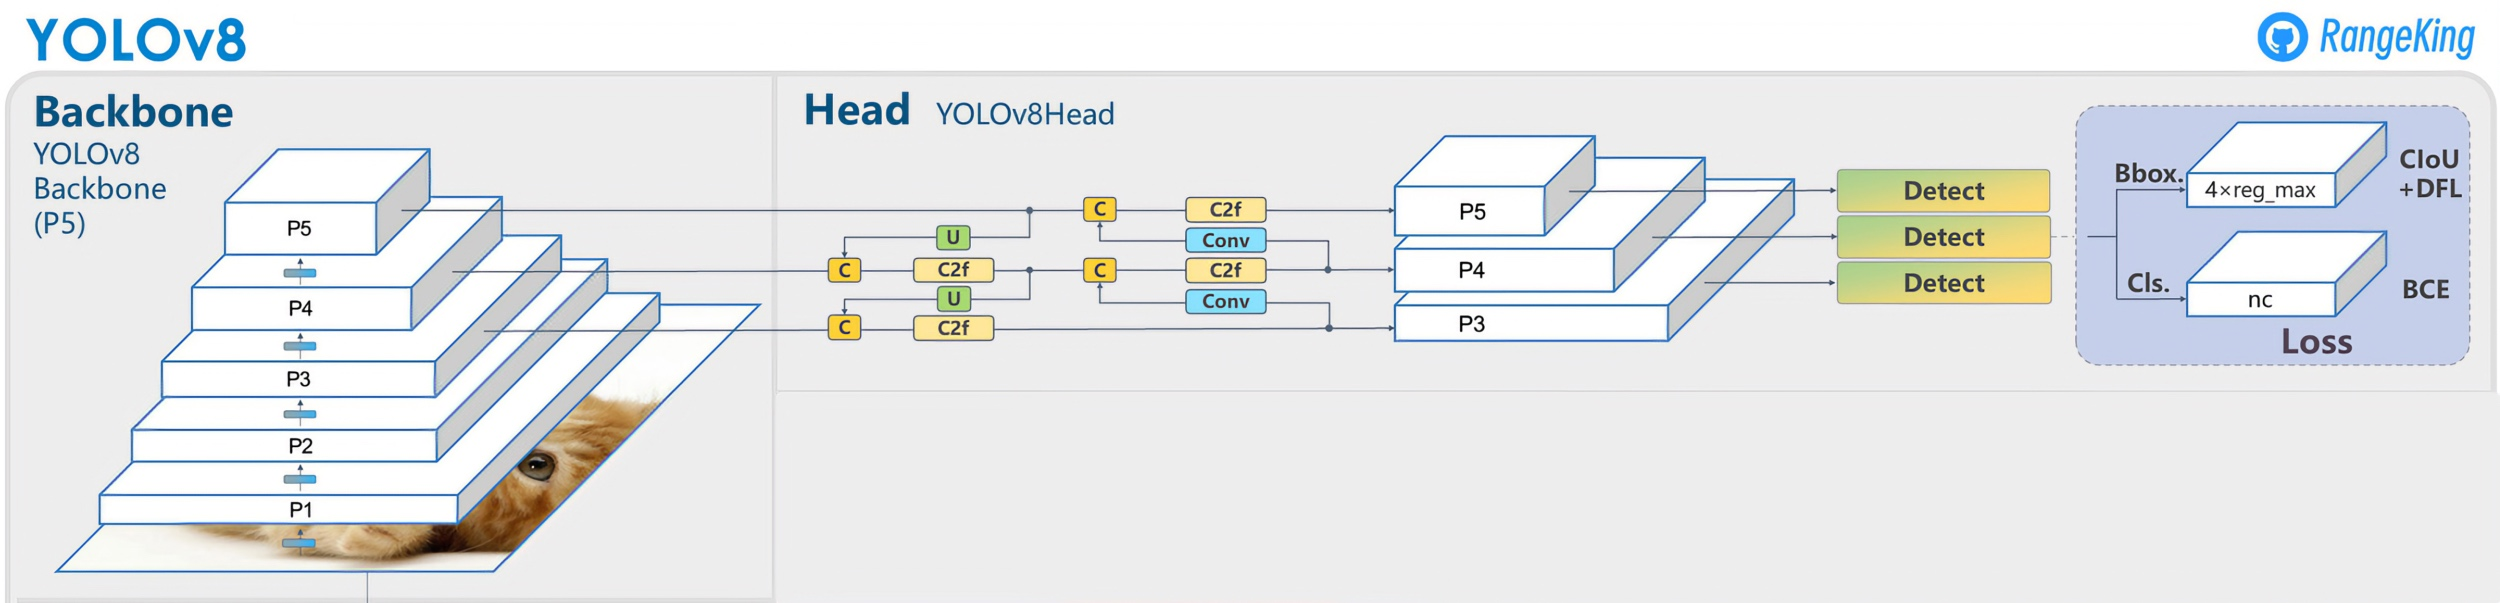
Схема архитектуры

Архитектура YOLOv8 является anchor-free, то есть модель учится напрямую находить координаты объектов на изображении, а не тренируется вычислять коэффициенты для масштрабирования и смещения готовых прямоугольников, чтобы они совпадали с границами объекта.

Пример визуализцаии anchor (якоря) у архитектуры YOLOv5:

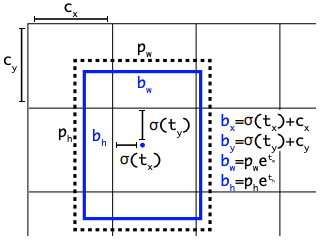

## Запуск ONNX модели
Для сравнения производительности фреймворков запустим модель YOLOv8 с помощью фреймворка PyTorch и библиотеки ONNXRuntime для запуска ONNX моделей.

In [ ]:
torch_model = YOLO('yolov8n.pt', task='detect')
onnx_model = YOLO('yolov8n.onnx', task='detect')

image = cv2.imread('test5.jpg', cv2.IMREAD_COLOR)  # Открытие цветного изображения (примечание: открывается в BGR)

# Делаем "пустые" запуски, чтобы модели полностью загрузились в память
_ = torch_model([image])
_ = onnx_model([image])

In [ ]:
%%time
# Замеряем скорость
_ = torch_model([image])

In [ ]:
%%time
_ = onnx_model([image])

In [ ]:
!pip install onnxruntime

## Постобработка результатов модели: Non-maximum suppression
Кроме конвертации в CoreML шаг постобработки не переносится.
Для этого предлагается ознакомиться с его реализацией более детально.
Для начала запустите все ячейки ниже на изображении со случайными пикселями.

## Задание 3
Замените случайно сгенерированное изображение x на реальное обработанное изображение (примеры обработки можете найти в предыдущей лабораторной работе).
После замены запустите все ячейки ниже ещё раз.

In [65]:
import numpy as np
import onnxruntime as ort

ort_model = ort.InferenceSession(
    'runs/detect/train2/weights/best.onnx',
    providers=['CPUExecutionProvider']
)


image = cv2.imread('test6.jpg', cv2.IMREAD_COLOR)
cv2.imshow('im2',image)
cv2.waitKey(0)

model_input_name = ort_model.get_inputs()[0].name
model_output_name = ort_model.get_outputs()[0].name

print(' Input name: {}\n Output name: {}'.format(model_input_name, model_output_name))

# x = np.random.rand(1, 3, 640, 640).astype(np.float32)
x = cv2.resize(image, (480, 480)).astype(np.float32).transpose(2, 0, 1)[None] / 255.0

out = ort_model.run(
    [model_output_name],
    {model_input_name: x}
)

print(out[0].shape)


 Input name: images
 Output name: output0
(1, 6, 4725)


Выход модели YOLO состоит из координат детекций и распределений вероятностей по всем классам, а также значении степени уверенности сети. И 2-я размерность состоит из:
4 (xywh) + 80 (количество классов + фон)

In [73]:
import torch
import torchvision

def xywh2xyxy(x):
  y = np.copy(x)
  y[..., 0] = x[..., 0] - x[..., 2] / 2  # top left x
  y[..., 1] = x[..., 1] - x[..., 3] / 2  # top left y
  y[..., 2] = x[..., 0] + x[..., 2] / 2  # bottom right x
  y[..., 3] = x[..., 1] + x[..., 3] / 2  # bottom right y
  return y

kx = image.shape[1] / 480
ky = image.shape[0] / 480

elem_out = out[0].transpose(0, 2, 1).squeeze()
print(elem_out.shape)

boxes = elem_out[:, :4] * np.array([[kx, ky, kx, ky]])
boxes = xywh2xyxy(boxes)
probs_max_value = elem_out[:, 4:].max(axis=1)
probs_max_index = elem_out[:, 4:].argmax(axis=1)

threshold = 0.2

filter_mask = probs_max_value > threshold

f_boxes = boxes[filter_mask].astype(np.int32)
f_probs_max_value = probs_max_value[filter_mask]
f_probs_max_index = probs_max_index[filter_mask]

keeps_elements = torchvision.ops.nms(
    torch.from_numpy(f_boxes.astype(np.float32)),
    torch.from_numpy(f_probs_max_value),
    0.1
)

f_boxes = f_boxes[keeps_elements]
f_probs_max_value = f_probs_max_value[keeps_elements]

#if len(f_boxes.shape) == 1:
#   f_boxes = f_boxes[None]

print(f_boxes.shape)


(4725, 6)
(3, 4)


In [74]:
# Отрисовка результатов

image = cv2.imread('test6.jpg', cv2.IMREAD_COLOR)  # Открытие цветного изображения (примечание: открывается в BGR)
colors = [(50, 20, 200), (200, 20, 100)]

detection_visualization = image.copy()

for detecion_id in range(len(f_boxes)):
  target_object_box = f_boxes[detecion_id]  # XcYcWH format
  target_object_prob = float(f_probs_max_value[detecion_id])

  detection_visualization = cv2.rectangle(
      detection_visualization,
      tuple(target_object_box[:2]),
      tuple(target_object_box[2:]),
      colors[detecion_id % len(colors)],
      5
  )

detection_visualization = cv2.resize(detection_visualization, None, fx=1/2, fy=1/2)

cv2.imshow("out",detection_visualization)
cv2.waitKey(0)

-1